In [1]:
import numpy as np   
import pandas as pd     
import itertools
import matplotlib.pyplot as plt  
import seaborn as sns        
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 1. Find the distribution of outcome feature

In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 2.Check whether it is imbalanced or balanced dataset

In [4]:
#A dataset is imbalanced if the classes within the dataset are not evenly distributed.
class_distribution = df['Outcome'].value_counts()

imbalance_ratio = class_distribution[1] / class_distribution[0]
print("Imbalance Ratio:", imbalance_ratio)


Imbalance Ratio: 0.536


# 3.	Find the mean age as per the outcome

In [12]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


# 4.	Find the max age as per the outcome

In [13]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


# 5.	Find the mean BMI as per the outcome

In [14]:
df.groupby("Outcome").agg({"BMI":"mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


# 6.	Find the max BMI as per the outcome

In [19]:
df.groupby("Outcome").agg({"BMI":"max"})

,BMI
Outcome,
0,57.3
1,67.1


# 7.	Create a Pie Chart showing the distribution of Outcome Feature

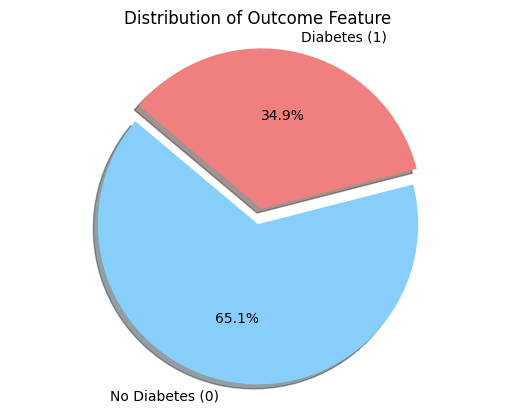

In [24]:
outcome_distribution = df['Outcome'].value_counts()
labels = ['No Diabetes (0)', 'Diabetes (1)']
sizes = outcome_distribution.values
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Diabetes)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Outcome Feature')
plt.show()

# 8.	Find all the pairs of features having correlation greater than 0.3

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find pairs of features with correlation greater than 0.3
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.3:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Pairs of features with correlation greater than 0.3:")
for pair in high_corr_pairs:
    print(pair)


Pairs of features with correlation greater than 0.3:
('Pregnancies', 'Age')
('Glucose', 'Insulin')
('Glucose', 'Outcome')
('SkinThickness', 'Insulin')
('SkinThickness', 'BMI')


# 9.	Find the features in which missing values are present

In [7]:
# Find columns with missing values
missing_values_columns = df.columns[df.isnull().any()]

print("Columns with missing values:")
print(missing_values_columns)

Columns with missing values:
Index([], dtype='object')


# 10.	Replace all the missing values with the mean or median value

In [5]:
# Calculate the mean or median value for each column
mean_values = df.mean()
median_values = df.median()

# Replace missing values with the mean or median value
data_filled_mean = df.fillna(mean_values)
data_filled_median = df.fillna(median_values)

# Print the updated datasets
print("Dataset with missing values filled using mean:")
print(data_filled_mean)

print("\nDataset with missing values filled using median:")
print(data_filled_median)

Dataset with missing values filled using mean:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                 

# 11.	Create a new Feature NewInsulinScore as per following criteria:                                 if "Insulin" >= 16 and "Insulin" <= 166 => then It is Normal otherwise Abnormal

In [7]:
# Create a new feature 'NewInsulinScore'
df['NewInsulinScore'] = df['Insulin'].apply(lambda x: 'Normal' if (x >= 16 and x <= 166) else 'Abnormal')
# Print the updated dataset with the new feature
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulinScore
0,6,148,72,35,0,33.6,0.627,50,1,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Abnormal
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Abnormal
764,2,122,70,27,0,36.8,0.340,27,0,Abnormal
765,5,121,72,23,112,26.2,0.245,30,0,Normal
766,1,126,60,0,0,30.1,0.349,47,1,Abnormal


# 12.	Create a Feature NewGlucose as per following Criteria
## a.	If "Glucose" <= 70 => Low
## b.	If "Glucose" > 70 & "Glucose" <= 99 => Normal
## c.	If "Glucose" > 99 & "Glucose" <= 126 => OverWeight
## d.	If "Glucose" > 126 => Secret

In [10]:
NewGlucose = pd.Series(["Low","Normal","OverWeight","Secret"],dtype="category")
df["NewGlucose"]= NewGlucose


df.loc[df['Glucose'] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df['Glucose'] > 70) &(df['Glucose'] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df['Glucose'] > 99) &(df['Glucose'] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df['Glucose'] > 126, "NewGlucose"] = NewGlucose[3]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulinScore,NewGlucose
0,6,148,72,35,0,33.6,0.627,50,1,Abnormal,Secret
1,1,85,66,29,0,26.6,0.351,31,0,Abnormal,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Abnormal,Secret
3,1,89,66,23,94,28.1,0.167,21,0,Normal,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Abnormal,Secret


# 13.	Create One hot encoding for NewInsulinScore and NewGlucose feature created earlier

In [11]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['NewInsulinScore', 'NewGlucose'], drop_first=True)

# Print the updated dataset with one-hot encoded features
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulinScore_Normal,NewGlucose_Normal,NewGlucose_OverWeight,NewGlucose_Secret
0,6,148,72,35,0,33.6,0.627,50,1,False,False,False,True
1,1,85,66,29,0,26.6,0.351,31,0,False,True,False,False
2,8,183,64,0,0,23.3,0.672,32,1,False,False,False,True
3,1,89,66,23,94,28.1,0.167,21,0,True,True,False,False
4,0,137,40,35,168,43.1,2.288,33,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,False,False,True,False
764,2,122,70,27,0,36.8,0.340,27,0,False,False,True,False
765,5,121,72,23,112,26.2,0.245,30,0,True,False,True,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False


# 14.	Create Training and Testing Dataset (Take 12% as test dataset)
## a.	Use following Algorithms to train on the dataset:
## i.	'Logistic Regression',  ii.	'KNN',  iii.	'SVM', iv.	"Naive Bayes" v.	'Decision Tree Classifier',  vi.	'Random Forest Classifier' vii.	'XgBoost'


In [12]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Initialize and train the machine learning algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XgBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name}: Accuracy = {accuracy:.2f}')


C:\Users\saikr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.76
KNN: Accuracy = 0.70
SVM: Accuracy = 0.77
Naive Bayes: Accuracy = 0.71
Decision Tree: Accuracy = 0.77
Random Forest: Accuracy = 0.73
XgBoost: Accuracy = 0.73


# 15.	Find Value of k for which KNN Gives Best Accuracy

In [11]:
# Find the value of k for KNN that gives the best accuracy
best_accuracy = 0
best_k = 0

for k in range(1, 21):  # You can adjust the range of k values to test
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_scores = cross_val_score(knn, X_train, y_train, cv=5)
    avg_accuracy = accuracy_scores.mean()
    
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_k = k

print(f"Best value of k for KNN: {best_k}, Best accuracy: {best_accuracy:.2f}")


Best value of k for KNN: 14, Best accuracy: 0.75


# 16.	Print all evaluation metrics for all the Algorithms(find it on Test Data) i.e Precision, Recall, Accuracy and F1 Score, Confusion Matrix

In [13]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'{name}:')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Confusion Matrix:')
    print(cm)
    print('---')


C:\Users\saikr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Precision: 0.68
Recall: 0.72
Accuracy: 0.78
F1 Score: 0.70
Confusion Matrix:
[[50 11]
 [ 9 23]]
---
KNN:
Precision: 0.56
Recall: 0.56
Accuracy: 0.70
F1 Score: 0.56
Confusion Matrix:
[[47 14]
 [14 18]]
---
SVM:
Precision: 0.72
Recall: 0.56
Accuracy: 0.77
F1 Score: 0.63
Confusion Matrix:
[[54  7]
 [14 18]]
---
Naive Bayes:
Precision: 0.56
Recall: 0.84
Accuracy: 0.72
F1 Score: 0.68
Confusion Matrix:
[[40 21]
 [ 5 27]]
---
Decision Tree:
Precision: 0.66
Recall: 0.72
Accuracy: 0.77
F1 Score: 0.69
Confusion Matrix:
[[49 12]
 [ 9 23]]
---
Random Forest:
Precision: 0.61
Recall: 0.62
Accuracy: 0.73
F1 Score: 0.62
Confusion Matrix:
[[48 13]
 [12 20]]
---
XgBoost:
Precision: 0.60
Recall: 0.66
Accuracy: 0.73
F1 Score: 0.63
Confusion Matrix:
[[47 14]
 [11 21]]
---
